*Python Machine Learning 2nd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Code Repository: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# Python Machine Learning - Code Examples

# Chapter 11 - Working with Unlabeled Data – Clustering Analysis

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

## Parte 1: Agrupamiento por representantes
## K-means clustering and elbow method

In [17]:
from sklearn import datasets
import numpy as np
from sklearn.cluster import KMeans


iris = datasets.load_iris()
X = iris.data[:, [2, 3]]

In [20]:
inertia = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42).fit(X)
    inertia[k] = kmeans.inertia_ # tomamos las inercias 

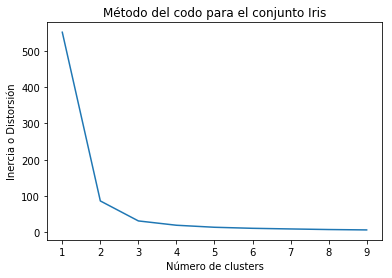

In [25]:
plt.figure()
plt.plot(list(inertia.keys()), list(inertia.values()))
plt.title('Método del codo para el conjunto Iris')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia o Distorsión")
plt.show()

In [27]:
# Ahora que sabemos que el número óptimo de clusters para este conjunto
# se encuentra entre 2 y 3 (observamos que el codo comienza, de derecha a izquierda, en 3)
# tomamos este como el óptimo.

km = KMeans(n_clusters=3,
           init='k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=42)
km_y = km.fit_predict(X)

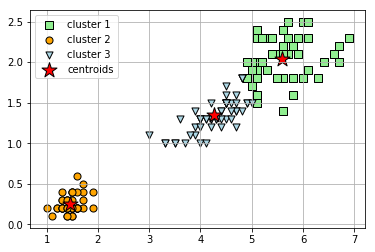

In [33]:
plt.scatter(X[km_y == 0, 0], 
            X[km_y == 0, 1],
            s=50, c='lightgreen',
           marker='s', edgecolor='black',
           label='cluster 1')
plt.scatter(X[km_y == 1, 0], 
            X[km_y == 1, 1],
            s=50, c='orange',
           marker='o', edgecolor='black',
           label='cluster 2')
plt.scatter(X[km_y == 2, 0], 
            X[km_y == 2, 1],
            s=50, c='lightblue',
           marker='v', edgecolor='black',
           label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:, 1],
            s=250, c='red',
           marker='*', edgecolor='black',
           label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

# Organizing clusters as a hierarchical tree

## Grouping clusters in bottom-up fashion

In [5]:
import pandas as pd
import numpy as np

np.random.seed(123)

variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']

# For the Iris dataset (you must load it from Scikit-Learn's datasets):
#    Variables => petal length and petal width
#    Labels => ID_0, ID_1, ..., ID_149 (the 150 dataset instances)

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


## Performing hierarchical clustering

In [9]:
# Definición de funciones de distancia
# las métricas son: euclidiana(l2), manhattan (l1)

def l1(x, y):
    x = np.array(x)
    y = np.array(y)
    d = sum((x - y)**2)
    return np.sqrt(d)


def l2(x, y):
    x = np.array(x)
    y = np.array(y)
    d = abs(x - y)
    return sum(d)

In [26]:
# función para obtener la matríz de distancias
# devuelve una matríz cuadrada de nxn donde n es el número de datos
def d_matrix(X, metric):
    if metric == 'euclidean':
        f = l2
    elif metric == 'l1':
        f = l1
    distances = []
    for x in X:
        for xx in X:
            distances.append(f(x, xx))
    shape = int(np.sqrt(len(distances)))
    return np.array(distances).reshape(shape, shape)

In [19]:
# This is the function you have to code:
def linkage(X, method='complete', metric='euclidean'):
    """ Implements agglomerative hierarchical clustering using the complete
        linkage approach (and the euclidean distance as metric)
    """
    #
    # Your code goes here
    #
    return row_clusters

In [ ]:
row_clusters = linkage(X, method='complete', metric='euclidean')

In [ ]:
type(row_clusters)

In [ ]:
row_clusters

In [ ]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')

plt.show()